In [1]:
library(SPOTlight)
library(rhdf5)
Sys.setenv(RETICULATE_PYTHON = "/media/gambino/students_workdir/ibp/gautam/miniconda3/envs/r_kernel/bin/python")
library(reticulate)
use_condaenv(condaenv = "r_kernel", conda  = "/media/gambino/students_workdir/ibp/gautam/miniconda3/bin/conda")
library(anndata)
library(SpatialExperiment)
library(SingleCellExperiment)
library(scater)
library(scran)
library(zellkonverter)
library(Seurat)
library(dplyr)
library(Matrix)
library(ggcorrplot)
library(Polychrome)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCums

In [2]:
c2l_res_1579 <- read.csv("/media/gambino/students_workdir/nynke/results/results/explodedGut/1579_6cell_highconfidencemodel.csv")
c2l_res_1345 <- read.csv("/media/gambino/students_workdir/nynke/results/results/explodedGut/1345_7cell_highconfidencemodel.csv")
c2l_spe_1579 <- read10xVisium(
  samples = "/media/gambino/students_workdir/ibp/visium_data/Slide1/1579_deep/outs",
  sample_id = "1579_deep",
  type = "HDF5",
  data = "filtered",
  images = "hires",
  load = FALSE
  )
c2l_spe_1345 <- read10xVisium(
  samples = "/media/gambino/students_workdir/ibp/visium_data/Slide2-3/1345_start-EP/outs",
  sample_id = "1345_start-EP",
  type = "HDF5",
  data = "filtered",
  images = "hires",
  load = FALSE
  )

In [7]:
rownames(c2l_res_1345) <- colnames(c2l_spe_1345)
rownames(c2l_res_1579) <- colnames(c2l_spe_1579)

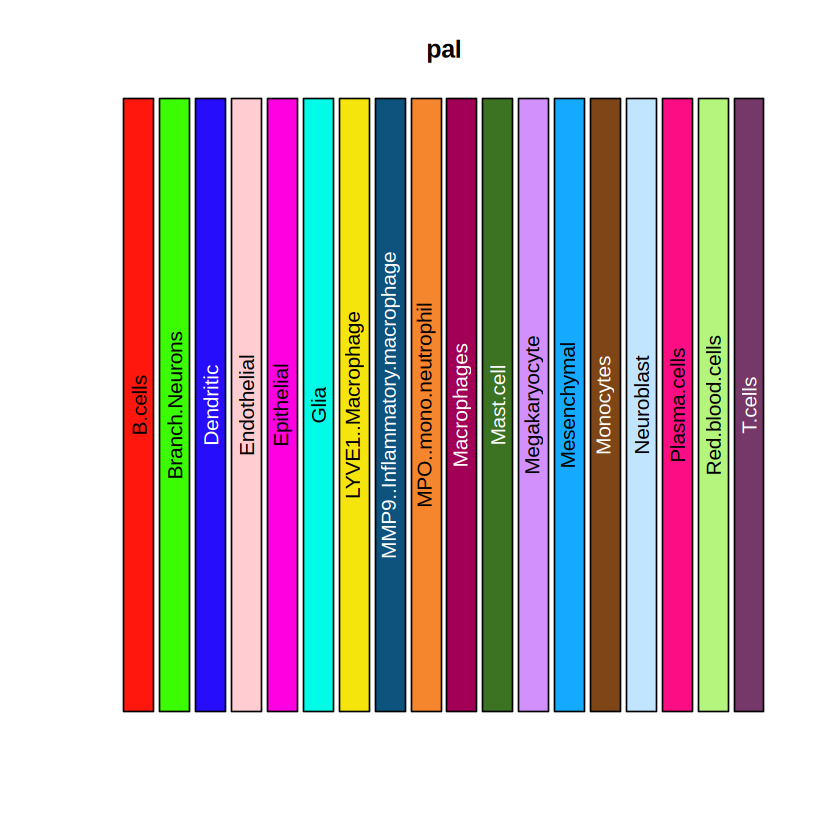

In [12]:
ct <- colnames(c2l_res_1345)

#mat[mat < 0.1] <- 0

pal = createPalette(length(ct),  c("#ff0000", "#00ff00", "#0000ff"))
names(pal) <- ct
swatch(pal)

In [16]:
write.table(pal, "/media/gambino/students_workdir/ibp/good_color_palette.txt")

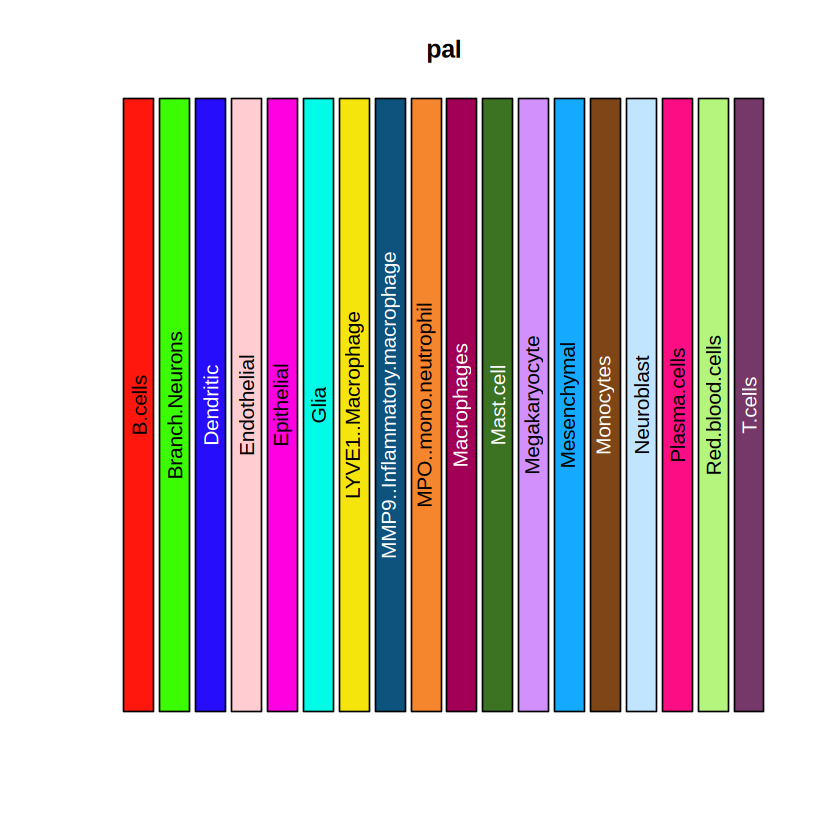

In [14]:
swatch(pal)

In [9]:
c2l_1345_scatterpie <- plotSpatialScatterpie(
    x = c2l_spe_1345,
    y = c2l_res_1345,
    cell_types = colnames(c2l_res_1345),
    img = TRUE,
    scatterpie_alpha = 1,
    pie_scale = 0.4,
    axis = "h",
    degrees = 270) +
    scale_fill_manual(
        values = pal, 
        breaks = names(pal)
        ) +
    guides(color = guide_legend(override.aes = list(size = 0.5)))

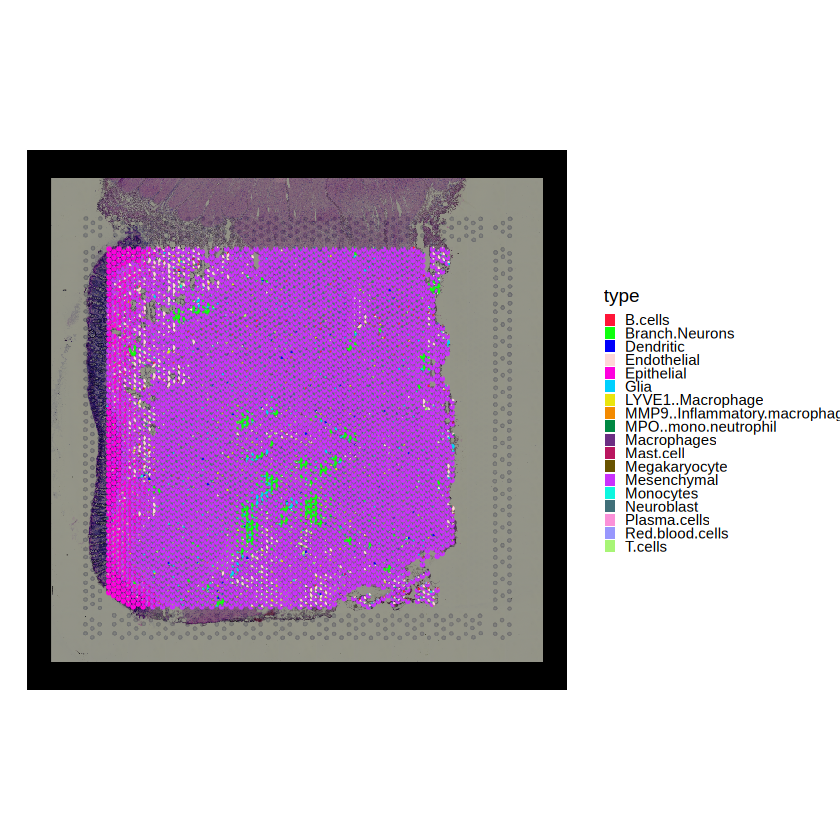

In [10]:
c2l_1345_scatterpie

In [ ]:
c2l_1579_scatterpie <- plotSpatialScatterpie(
    x = c2l_spe_1579,
    y = c2l_res_1579,
    cell_types = colnames(c2l_res_1579),
    img = TRUE,
    scatterpie_alpha = 1,
    pie_scale = 0.4,
    axis = "h",
    degrees = 270) +
    scale_fill_manual(
        values = pal, 
        breaks = names(pal)
        ) +
    guides(color = guide_legend(override.aes = list(size = 0.5)))